# Creando nuestro propio KNN

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from  matplotlib import style
import warnings
from math import sqrt
from collections import Counter

In [5]:
dataset ={
    'k':[[1,2],[2,3],[3,1]],  # Coordenadas del array
    'b':[[6,5],[7,7],[8,6]]   # 
}
new_point = [5,7]

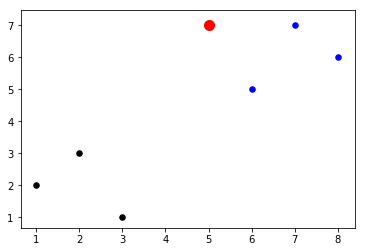

In [9]:
# Con esta función se crea un gráfico tomando datos del diccionario (las coordenadas)
[[plt.scatter(ii[0],ii[1], s = 30, color = i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_point[0],new_point[1], s = 100, color = 'r')   # Punto nuevo

### Crear una función

In [42]:
def k_nearest_neighbors(data, predict, k = 3, verbose = False):  # K es el número de vecinos que van a decidir

    if len(data) <= k:
        warnings.warn('K es un valor menor que el número total de elementos a votar')
    
    distances = []
    for group in data:
        for feature in data[group]:
            #d = sqrt((feature[0]-predict[0])**2 +(feature[1]-predict[1])**2)  # Distancia euclidea
            #d = np.sqrt(np.sum((np.array(feature)-np.array(predict))**2))  # Distancia euclidea con numpy
            d = np.linalg.norm(np.array(feature)-np.array(predict))   # Distancia euclidea con algebra lineal y normalización
            distances.append([d,group])
            
    #votos de los vecinos
    if verbose:
        print(distances)
    votes = [i[1] for i in sorted(distances)[:k]]   # Sorted ordena por la primera columna de la lista
    if verbose:
        print(votes)
    
    vote_result = Counter(votes).most_common(1)
    if verbose:
        print(vote_result)
    return vote_result[0][0]


In [21]:
new_point=[7,7]
result = k_nearest_neighbors(dataset, new_point)
result
# El modelo predice que el new_point (punto a predecir), por votación de los vecinos, es un azul

[[7.810249675906654, 'k'], [6.4031242374328485, 'k'], [7.211102550927978, 'k'], [2.23606797749979, 'b'], [0.0, 'b'], [1.4142135623730951, 'b']]
['b', 'b', 'b']
[('b', 3)]


C:\Users\TOM.ZG\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: K es un valor menor que el número total de elementos a votar
  after removing the cwd from sys.path.


'b'

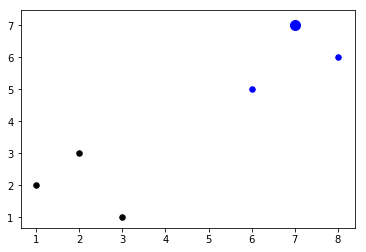

In [22]:
# Con esta función se crea un gráfico tomando datos del diccionario (las coordenadas)
[[plt.scatter(ii[0],ii[1], s = 30, color = i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_point[0],new_point[1], s = 100, color = result)   # Punto nuevo (#Queda del color del resultado)

# Prueba con dataset de la enfermedad

In [23]:
import pandas as pd

In [24]:
df = pd.read_csv('https://raw.githubusercontent.com/joanby/python-ml-course/master/datasets/cancer/breast-cancer-wisconsin.data.txt',
                header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [25]:
df.replace('?',-9999, inplace = True)

In [27]:
# Cambiar nombres de las columnas
df.columns=['name',  'V1','V2','V3','V4','V5','V6','V7','V8','V9','class']

In [29]:
df.drop(['name'], axis = 1, inplace = True)

In [30]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [31]:
# Convertir a floats y formato de array
full_data = df.astype(float).values.tolist()
full_data

[[5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [5.0, 4.0, 4.0, 5.0, 7.0, 10.0, 3.0, 2.0, 1.0, 2.0],
 [3.0, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 1.0, 1.0, 2.0],
 [6.0, 8.0, 8.0, 1.0, 3.0, 4.0, 3.0, 7.0, 1.0, 2.0],
 [4.0, 1.0, 1.0, 3.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [8.0, 10.0, 10.0, 8.0, 7.0, 10.0, 9.0, 7.0, 1.0, 4.0],
 [1.0, 1.0, 1.0, 1.0, 2.0, 10.0, 3.0, 1.0, 1.0, 2.0],
 [2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 5.0, 2.0],
 [4.0, 2.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [5.0, 3.0, 3.0, 3.0, 2.0, 3.0, 4.0, 4.0, 1.0, 4.0],
 [1.0, 1.0, 1.0, 1.0, 2.0, 3.0, 3.0, 1.0, 1.0, 2.0],
 [8.0, 7.0, 5.0, 10.0, 7.0, 9.0, 5.0, 5.0, 4.0, 4.0],
 [7.0, 4.0, 6.0, 4.0, 6.0, 1.0, 4.0, 3.0, 1.0, 4.0],
 [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [10.0, 7.0, 7.0, 6.0, 4.0, 10.0, 4.0, 1

In [32]:
# Dividir datos en conjunto de entrenamiento y de testing (con la clase random)
import random 

In [33]:
# reordenar datos aleatoriamente
random.shuffle(full_data)

In [37]:
# Tamaño del data set test
test_size = 0.2

In [38]:
train_set = {2:[],4:[]}
test_set = {2:[],4:[]}

In [39]:
train_data = full_data[:-int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]

In [40]:
for i in train_data:
    train_set[i[-1]].append(i[:-1])

for i in test_data:
    test_set[i[-1]].append(i[:-1])

In [41]:
train_set

{2: [[3.0, 1.0, 1.0, 1.0, 2.0, 5.0, 1.0, 1.0, 1.0],
  [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [1.0, 2.0, 3.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0],
  [6.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0],
  [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [6.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0],
  [1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0],
  [2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0],
  [3.0, 3.0, 2.0, 1.0, 2.0, 3.0, 3.0, 1.0, 1.0],
  [3.0, 2.0, 1.0, 2.0, 2.0, 1.0, 3.0, 1.0, 1.0],
  [1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [1.0, 1.0, 3.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [1.0, 3.0, 1.0, 2.0, 2.0, 2.0, 5.0, 3.0, 2.0],
  [5.0, 1.0, 1.0, 1.0, 2.0, -9999.0, 3.0, 1.0, 1.0],
  [5.0, 1.0, 1.0, 4.0, 2.0, 1.0, 3.0, 1.0, 1.0],
  [5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0],
  [5.0, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 3.0, 1.0],
  [4.0, 1.0, 

In [47]:
correct = 0
total = 0
for group in test_set:
    for data in test_set[group]:
        vote = k_nearest_neighbors(train_set,data, k = 5)
        if group == vote:
            correct +=1
        total +=1
print('Eficacia del k-nearest= ', correct /total )

C:\Users\TOM.ZG\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: K es un valor menor que el número total de elementos a votar
  after removing the cwd from sys.path.


Eficacia del k-nearest=  0.9712230215827338
